Cette première cellule vous présente la manière avec laquelle j'ai obtenu les features/caractéristiques à partir des jeux de données de "textes"
Pour obtenir les textes (et les "filtrer") j'ai utiliser le script ./textDatasets/conversion.sh (qui prends, par exemple les fichiers FR_* les concatene, supprime les accents (en gardant les caracteres sans accents) et enfin transforme en minuscules).
J'ai utilisé les livres "open data" de la base du site Guttenberg Project (qui archive énormément de livres en texte, "txt" simples", tombés dans le domaine publique).

In [1]:
import numpy as np
import string
BlockSz=100
# On procede de la même façon pour les differents languages
# Ouverture du fichier texte contenant les caracteres alphabetiques "brutes"
textGERMAN = open('./textDatasets/GERMAN')
# Lecture
DE=textGERMAN.read()
textGERMAN.close()
# Calcule du nombre de blocks (arrondi par defaut) de BlockSz caracteres
NbBlock=int(np.floor(len(DE)/BlockSz))
# Creation des tableaux de donnees textuelles et de features
DataDE=[]
FeaDE =[]
# Pour tous les indices de blocks ...
for index in range(NbBlock):
    # Exctraction des donnees texte du block
    DataDE.append(DE[index*BlockSz:(index+1)*BlockSz])
    # Comptage de chacun des caracteres
    countDE=[]
    for letter in string.ascii_lowercase:
        countDE.append(DataDE[index].count(letter))
    # Comptage de toutes les 26**2 paires de caracteres possibles
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countDE.append(DataDE[index].count(letter1+letter2))
    # Une fois le vecteur de décompte obtenu  .... on ajoute ce vecteur (contenant tous les decomptes) au tableaux des features
    FeaDE.append(countDE)

# On procede de la même façon pour les differents languages ....
textFRENCH = open('./textDatasets/FRENCH')
FR=textFRENCH.read()
textFRENCH.close()
NbBlock=int(np.floor(len(FR)/BlockSz))
DataFR=[]
FeaFR =[]
for index in range(NbBlock):
    DataFR.append(FR[index*BlockSz:(index+1)*BlockSz])
    countFR=[]
    for letter in string.ascii_lowercase:
        countFR.append(DataFR[index].count(letter))
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countFR.append(DataFR[index].count(letter1+letter2))
    FeaFR.append(countFR)

# On procede de la même façon pour les differents languages ....
textSPANISH = open('./textDatasets/SPANISH')
ES=textSPANISH.read()
textSPANISH.close()
NbBlock=int(np.floor(len(ES)/BlockSz))
DataES=[]
FeaES =[]
for index in range(NbBlock):
    DataES.append(ES[index*BlockSz:(index+1)*BlockSz])
    countES=[]
    for letter in string.ascii_lowercase:
        countES.append(DataES[index].count(letter))
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countES.append(DataES[index].count(letter1+letter2))
    FeaES.append(countES)

# On procede de la même façon pour les differents languages ....
textENGLISH = open('./textDatasets/ENGLISH')
EN=textENGLISH.read()
textENGLISH.close()
NbBlock=int(np.floor(len(EN)/BlockSz))
DataEN=[]
FeaEN =[]
for index in range(NbBlock):
    DataEN.append(EN[index*BlockSz:(index+1)*BlockSz])
    countEN=[]
    for letter in string.ascii_lowercase:
        countEN.append(DataEN[index].count(letter))
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countEN.append(DataEN[index].count(letter1+letter2))
    FeaEN.append(countEN)

In [2]:
# Ici on sauvegarde les caracteristiques, pour eviter de les recalculer à chaque fois ....

np.save('./FeaEN.npy', FeaEN)
np.save('./FeaFR.npy', FeaFR)
np.save('./FeaDE.npy', FeaDE)
np.save('./FeaES.npy', FeaES)

In [3]:
# ... On peut simplement les loader (et commenter les cellules precedentes)
#import numpy as np
FeaEN = np.load('./FeaEN.npy')
FeaFR = np.load('./FeaFR.npy')
FeaDE = np.load('./FeaDE.npy')
FeaES = np.load('./FeaES.npy')

In [4]:
# Pour plus de "facilier de manipulation" on trasforme les donnes en "matrice numpy" et on affiche la dimension de la base de donnees.
FeaDE = np.array(FeaDE)
print(FeaDE.shape)

FeaFR = np.array(FeaFR)
print(FeaFR.shape)

FeaES = np.array(FeaES)
print(FeaES.shape)

FeaEN = np.array(FeaEN)
print(FeaEN.shape)

(43292, 702)
(41160, 702)
(43218, 702)
(42095, 702)


On va premièrement travailler sur la langue française et allemande pour les premières questions. La langue française sera labilisé par 1 alors que l'allemand avec un 0

In [5]:
import pandas as pd
df_DE = pd.DataFrame(data=FeaDE)
df_DE.head()
df_DE["langue"]=0
df_DE.head()

,0,1,2,3,4,5,6,7,8,9,...,693,694,695,696,697,698,699,700,701,langue
0,1,3,0,7,18,1,5,5,8,1,...,0,0,1,2,0,0,0,0,0,0
1,6,2,5,6,12,9,4,6,7,0,...,0,0,0,0,0,0,0,0,0,0
2,4,4,2,5,18,2,1,2,6,1,...,0,0,1,0,0,0,0,0,0,0
3,10,0,6,5,14,1,3,7,5,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,4,19,2,5,7,7,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_EN = pd.DataFrame(data=FeaEN)
df_EN.head()
df_EN["langue"]=1
df_EN.head()

,0,1,2,3,4,5,6,7,8,9,...,693,694,695,696,697,698,699,700,701,langue
0,8,3,4,5,13,1,3,3,10,0,...,0,0,0,0,0,0,0,0,0,1
1,6,3,2,5,13,1,4,8,8,0,...,0,0,0,0,0,0,0,0,0,1
2,7,2,5,2,7,1,1,6,10,0,...,0,0,0,0,0,0,0,0,0,1
3,6,0,2,7,16,2,1,9,5,0,...,0,0,0,0,0,0,0,0,0,1
4,9,3,2,6,11,2,4,6,9,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
df_ENvsDE=pd.concat([df_EN,df_DE])

In [8]:
print("la taille de concaténation:",df_ENvsDE.shape[0],"la taille de la somme:",(df_EN.shape[0]+df_DE.shape[0]))

la taille de concaténation: 85387 la taille de la somme: 85387


Si on laisse le dataframe comme il est et on fait du train_test split, on tombera dans l'erreur d'avoir un y_test qui contient que des 1. Pour éviter ceci il faut mélanger les lignes du dataframe, on fait ceci avec la fonction sample

In [9]:
df_ENvsDE=df_ENvsDE.sample(frac=1).reset_index(drop=True)
df_ENvsDE

,0,1,2,3,4,5,6,7,8,9,...,693,694,695,696,697,698,699,700,701,langue
0,9,2,2,3,10,0,4,10,9,0,...,0,0,0,0,0,0,0,0,0,1
1,6,2,0,7,23,1,0,3,4,0,...,0,0,0,0,0,0,0,0,0,0
2,7,1,2,3,11,2,4,5,9,1,...,0,0,0,0,0,0,0,0,0,0
3,8,3,1,6,23,2,6,0,2,1,...,0,0,0,0,0,0,0,0,0,0
4,7,2,2,4,14,2,3,6,6,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85382,12,2,5,4,11,0,5,7,6,1,...,0,0,0,2,0,0,0,0,0,0
85383,8,5,1,8,20,1,0,8,4,0,...,0,0,0,0,0,0,0,0,0,1
85384,6,0,2,3,23,1,3,6,8,0,...,0,0,0,0,0,0,0,0,0,0
85385,6,1,2,3,6,1,1,5,8,0,...,0,0,0,0,0,0,0,0,0,1


## Questions:
* 1) Réaliser une classification binaire en utilisant les méthodes linéaires suivantes: regression "ridge", LASSO et SVM (sans noyau !).
 * Pour ces méthodes vous devez faire une recherche du meilleur paramètre de régularisation ;
 * Vous devrez égalemement selectionner les deux languages de votre choix
 * Dans l'exemple fourni la taille des block de caractère extraits 

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [11]:
X=df_ENvsDE.drop(["langue"],axis=1)
y=df_ENvsDE[['langue']]

In [12]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,692,693,694,695,696,697,698,699,700,701
0,9,2,2,3,10,0,4,10,9,0,...,0,0,0,0,0,0,0,0,0,0
1,6,2,0,7,23,1,0,3,4,0,...,0,0,0,0,0,0,0,0,0,0
2,7,1,2,3,11,2,4,5,9,1,...,0,0,0,0,0,0,0,0,0,0
3,8,3,1,6,23,2,6,0,2,1,...,0,0,0,0,0,0,0,0,0,0
4,7,2,2,4,14,2,3,6,6,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y.head()

,langue
0,1
1,0
2,0
3,0
4,1


#### Train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

#### metrics pour evaluer notre modèle

In [15]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,plot_confusion_matrix


def classification_metrics(y, y_pred):
    return pd.DataFrame(
        {
            "accuracy_score": metrics.accuracy_score(y_true=y, y_pred=y_pred),
            "f1_score": metrics.f1_score(y_true=y, y_pred=y_pred),
            "precision_score": metrics.precision_score(
                y_true=y, y_pred=y_pred),
            "recall_score": metrics.recall_score(y_true=y, y_pred=y_pred)
        },
        index=[0])

## Ridge

In [16]:
from sklearn.linear_model import Ridge

In [17]:
clf_ridge=Ridge()

In [18]:
clf_ridge.fit(X_train,y_train)
y_pred_ridge=clf_ridge.predict(X_test)

In [19]:
clf_ridge.score(X_test,y_test)

0.9556479574110788

(array([   37.,  5190., 20189.,  4550.,   228.,   149.,  2318., 15607.,
        10956.,   547.]),
 array([-0.42512368, -0.24577244, -0.06642119,  0.11293005,  0.2922813 ,
         0.47163254,  0.65098379,  0.83033504,  1.00968628,  1.18903753,
         1.36838877]),
 <BarContainer object of 10 artists>)

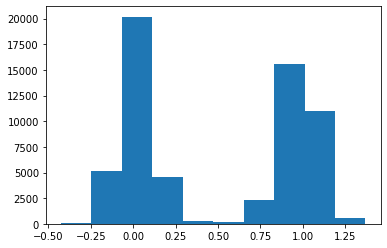

In [20]:
import matplotlib.pyplot as plt
plt.hist(y_pred_ridge)

à partir du score et de l'histogram on peut dire que le modele Ridge fonctionne très bien, il faut par la suite faire une classification avec un seuil 0.5 (partie B de cette question)

## LASSO

In [21]:
from sklearn import linear_model

In [22]:
clf_lasso=linear_model.Lasso()
clf_lasso.fit(X_train,y_train)

Lasso()

In [23]:
y_pred_lass=clf_lasso.predict(X_test)
y_pred_lass

array([0.49154796, 0.56321771, 0.3959883 , ..., 0.3959883 , 0.61099754,
       0.56321771])

In [24]:
clf_lasso.score(X_test,y_test)

0.21542738723066335

(array([1.6559e+04, 1.3406e+04, 1.0201e+04, 9.3910e+03, 6.4060e+03,
        3.3280e+03, 3.8900e+02, 6.7000e+01, 1.6000e+01, 8.0000e+00]),
 array([0.37209839, 0.4246562 , 0.47721401, 0.52977183, 0.58232964,
        0.63488745, 0.68744526, 0.74000308, 0.79256089, 0.8451187 ,
        0.89767651]),
 <BarContainer object of 10 artists>)

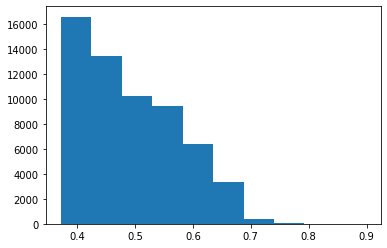

In [25]:
plt.hist(y_pred_lass)

le score et l'histogramme montre que le modèle lasso est très mauvais, on va essayer par la suite des chercher des meilleurs hyperparamètres avant de faire la classification 

### Cherchons des hyperparametres pour améliorer la performance des deux modeles modèles

In [26]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

In [27]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
  
grid_lasso = GridSearchCV(linear_model.Lasso(), lasso_params, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_lasso.fit(X_train, y_train.values.ravel()) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .....................................alpha=0.02; total time=   0.6s
[CV 2/5] END .....................................alpha=0.02; total time=   0.6s
[CV 3/5] END .....................................alpha=0.02; total time=   0.6s
[CV 4/5] END .....................................alpha=0.02; total time=   0.6s
[CV 5/5] END .....................................alpha=0.02; total time=   0.6s
[CV 1/5] END ....................................alpha=0.024; total time=   0.7s
[CV 2/5] END ....................................alpha=0.024; total time=   0.6s
[CV 3/5] END ....................................alpha=0.024; total time=   0.6s
[CV 4/5] END ....................................alpha=0.024; total time=   0.6s
[CV 5/5] END ....................................alpha=0.024; total time=   0.6s
[CV 1/5] END ....................................alpha=0.025; total time=   0.6s
[CV 2/5] END ....................................

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]},
             verbose=3)

In [28]:
# print best parameter after tuning 
print(grid_lasso.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_lasso.best_estimator_) 

{'alpha': 0.02}
Lasso(alpha=0.02)


In [29]:
grid_lasso.score(X_test,y_test)

0.908466449476248

In [30]:
y_pred_grid_lasso= grid_lasso.predict(X_test) 

(array([3.0300e+02, 8.3100e+03, 1.7060e+04, 4.2140e+03, 5.8700e+02,
        5.2890e+03, 1.5716e+04, 7.6540e+03, 6.2200e+02, 1.6000e+01]),
 array([-0.4267225 , -0.22041752, -0.01411253,  0.19219245,  0.39849743,
         0.60480242,  0.8111074 ,  1.01741239,  1.22371737,  1.43002235,
         1.63632734]),
 <BarContainer object of 10 artists>)

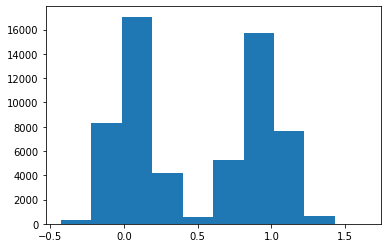

In [31]:
plt.hist(y_pred_grid_lasso)

In [32]:
(y_pred_grid_lasso==0.5).sum()

0

In [33]:
grid_ridge = GridSearchCV(Ridge(), ridge_params, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_ridge.fit(X_train, y_train.values.ravel()) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......................................alpha=200; total time=   0.3s
[CV 2/5] END ......................................alpha=200; total time=   0.3s
[CV 3/5] END ......................................alpha=200; total time=   0.3s
[CV 4/5] END ......................................alpha=200; total time=   0.3s
[CV 5/5] END ......................................alpha=200; total time=   0.3s
[CV 1/5] END ......................................alpha=230; total time=   0.3s
[CV 2/5] END ......................................alpha=230; total time=   0.3s
[CV 3/5] END ......................................alpha=230; total time=   0.3s
[CV 4/5] END ......................................alpha=230; total time=   0.3s
[CV 5/5] END ......................................alpha=230; total time=   0.3s
[CV 1/5] END ......................................alpha=250; total time=   0.3s
[CV 2/5] END ....................................

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [200, 230, 250, 265, 270, 275, 290, 300,
                                   500]},
             verbose=3)

In [34]:
# print best parameter after tuning 
print(grid_ridge.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_ridge.best_estimator_) 

{'alpha': 200}
Ridge(alpha=200)


In [35]:
grid_ridge.score(X_test,y_test)

0.9555311214187032

les performances sont persque les mêmes pour le modèle ridge

In [36]:
y_pred_grid_ridge= grid_ridge.predict(X_test) 

je veux considérer 0.5 comme seuil pour faire la classification, cepandant de crainte que les valeurs prédites prènnent 0.5 je fait la vérification pour savoir s'il faut inculre l'égalité dans l'une des classes

In [37]:
(y_pred_grid_ridge==0).sum()

0

In [38]:
grid_ridge.score(X_test,y_test)

0.9555311214187032

(array([  664., 14028., 14059.,  1317.,   166.,   226.,  4335., 16919.,
         7777.,   280.]),
 array([-0.32673128, -0.15576871,  0.01519385,  0.18615642,  0.35711898,
         0.52808154,  0.69904411,  0.87000667,  1.04096924,  1.2119318 ,
         1.38289436]),
 <BarContainer object of 10 artists>)

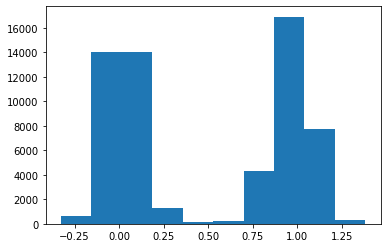

In [39]:
plt.hist(y_pred_grid_ridge)

### classification

In [40]:
for i in range(len(y_pred_grid_ridge)):
    if(y_pred_grid_ridge[i]<0.5):
        y_pred_grid_ridge[i]=0
    else:
        y_pred_grid_ridge[i]=1           

In [41]:
for i in range(len(y_pred_grid_lasso)):
    if(y_pred_grid_lasso[i]<0.5):
        y_pred_grid_lasso[i]=0
    else:
        y_pred_grid_lasso[i]=1    

### evaluation des modèles

In [42]:
print("Classification metrics pour le test du modèle ridge avec les meilleurs hyperparamètres ")
print(classification_metrics(y_test, y_pred_grid_ridge))

Classification metrics pour le test du modèle ridge avec les meilleurs hyperparamètres 
   accuracy_score  f1_score  precision_score  recall_score
0         0.99836   0.99834         0.996787      0.999898


In [43]:
print("Classification metrics pour le test du modèle lasso avec les meilleurs hyperparamètres")
print(classification_metrics(y_test, y_pred_grid_lasso))

Classification metrics pour le test du modèle lasso avec les meilleurs hyperparamètres
   accuracy_score  f1_score  precision_score  recall_score
0        0.996319  0.996278         0.993522       0.99905


### Matrice de confusion

In [44]:
confusion_matrix(y_test, y_pred_grid_ridge)

array([[30203,    95],
       [    3, 29470]], dtype=int64)

In [45]:
confusion_matrix(y_test, y_pred_grid_lasso)

array([[30106,   192],
       [   28, 29445]], dtype=int64)

## SVM Sans Noyau

In [46]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train.values.ravel())

SVC(kernel='linear')

In [47]:
y_pred4 = svclassifier.predict(X_test)

In [48]:
confusion_matrix(y_test,y_pred4)

array([[30274,    24],
       [    6, 29467]], dtype=int64)

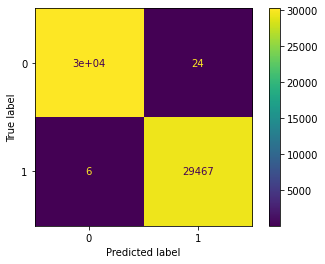

In [49]:
plot_confusion_matrix(svclassifier, X_test, y_test)  
plt.show() 

In [50]:
print(classification_metrics(y_test, y_pred4))

   accuracy_score  f1_score  precision_score  recall_score
0        0.999498  0.999491         0.999186      0.999796


### Cherchons les hyperparametres pour améliorer la performance du modèle svm

In [51]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train.values.ravel()) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   2.0s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   1.9s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   2.1s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   2.1s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   2.1s
[CV 1/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=   2.2s
[CV 2/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=   2.0s
[CV 3/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=   2.2s
[CV 4/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=   2.1s
[CV 5/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=   2.3s
[CV 1/5] END ...............C=0.1, gamma=0.01, kernel=linear; total time=   2.1s
[CV 2/5] END ...............C=0.1, gamma=0.01, 

[CV 2/5] END .................C=1000, gamma=1, kernel=linear; total time=   1.9s
[CV 3/5] END .................C=1000, gamma=1, kernel=linear; total time=   2.0s
[CV 4/5] END .................C=1000, gamma=1, kernel=linear; total time=   1.9s
[CV 5/5] END .................C=1000, gamma=1, kernel=linear; total time=   1.9s
[CV 1/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   2.0s
[CV 2/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   1.9s
[CV 3/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   2.0s
[CV 4/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   1.9s
[CV 5/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   1.9s
[CV 1/5] END ..............C=1000, gamma=0.01, kernel=linear; total time=   1.9s
[CV 2/5] END ..............C=1000, gamma=0.01, kernel=linear; total time=   1.9s
[CV 3/5] END ..............C=1000, gamma=0.01, kernel=linear; total time=   2.0s
[CV 4/5] END ..............C

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [52]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, gamma=1, kernel='linear')


In [53]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_metrics(y_test, grid_predictions))

   accuracy_score  f1_score  precision_score  recall_score
0        0.999498  0.999491         0.999186      0.999796


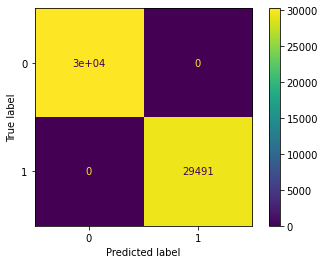

In [54]:
plot_confusion_matrix(grid, X_test, grid_predictions)  
plt.show() 

## Questions:
* 2) Réaliser une classification binaire avec l'une des méthodes linéaire précédent en utilisant la réduction de dimension (ACP par exemple, ou une autre méthode)


cherchons premièrement le n_compenents idéale pour faire la pca sur ce jeu de données:
on peut faire ceci grace au plot de la variance expliquée cumulative en fonction des nombres de composants

In [55]:
from sklearn.decomposition import PCA

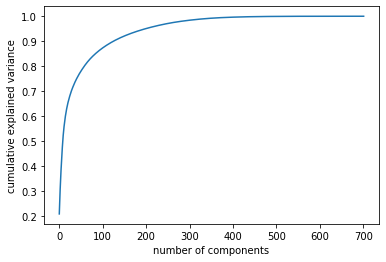

In [56]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

On peut comprendre du plot qu'il nous faut 400 composantes pour décrire à 100% de la variance

In [57]:
pca = PCA(n_components=400)
X_pca=pca.fit_transform(X_train)
X_pca_test=pca.fit_transform(X_test)

In [58]:
X_pca.shape

(25616, 400)

In [59]:
X_pca

array([[ 7.25025375e+00,  1.59821845e+00, -3.92276733e+00, ...,
         1.33899409e-02, -2.99575792e-02, -5.03217921e-02],
       [ 3.95566888e+00,  3.41402585e-01, -4.56422373e-01, ...,
        -4.53401359e-02,  6.36677482e-02, -1.14560250e-02],
       [ 1.19574102e+01, -5.42348321e+00, -6.15618330e+00, ...,
        -2.04254017e-01,  2.06207188e-01,  1.57812377e-01],
       ...,
       [-8.55497307e+00, -1.91746832e-01,  1.30281656e+00, ...,
        -1.18106580e-01,  9.18512829e-04, -1.33483147e-02],
       [ 6.72139979e+00, -3.36918837e-01, -2.83174906e+00, ...,
         4.18043837e-03, -4.53501451e-03, -4.64794562e-02],
       [ 3.57670761e+00,  1.43017706e+00, -3.19890145e+00, ...,
        -3.64207066e-02,  1.23870036e-01, -1.46894023e-01]])

In [60]:
pca=linear_model.Lasso()

In [61]:
pca.fit(X_pca, y_train)

Lasso()

In [62]:
y_pred_pca=pca.predict(X_pca_test)

In [63]:
pca.score(X_pca_test,y_test)

-1.4758525554298747

On remarque largement que la pca donne de meilleurs résultat pour le modèle lasso qui avait un score de 21%
alors qu'avec la pca on est monté à 72%

(array([  134.,  2697., 11845., 12043.,  4131.,  7382., 13228.,  7119.,
         1148.,    44.]),
 array([-0.26473754, -0.10561046,  0.05351662,  0.21264369,  0.37177077,
         0.53089785,  0.69002493,  0.84915201,  1.00827908,  1.16740616,
         1.32653324]),
 <BarContainer object of 10 artists>)

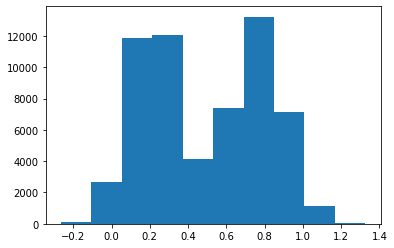

In [64]:
plt.hist(y_pred_pca)

In [65]:
for i in range(len(y_pred_pca)):
    if(y_pred_pca[i]<0.5):
        y_pred_pca[i]=0
    else:
        y_pred_pca[i]=1   

In [66]:
print("Classification metrics for test data")
print(classification_metrics(y_test, y_pred_pca))

Classification metrics for test data
   accuracy_score  f1_score  precision_score  recall_score
0        0.022352  0.010834          0.01081      0.010857


In [67]:
confusion_matrix(y_test,y_pred_pca)

array([[ 1016, 29282],
       [29153,   320]], dtype=int64)

## Questions:
* 3) Modifier la taille des données extraites (BlockSz) afin de trouver une taille à partir de la quelle un taux d'erreur de l'ordre de 10% est observée
 * Avec cette taille de block comparer les méthodes de classification précédentes (avec et sans réduction de dimentionalité)

En se basant sur le cours: on a erreur=(1 - np.sum(y_pred==y_test).astype(float)/n_test)

il faut alors chercher le nouveau n_test pour un taux d'erreur 10%
j'ai pris comme modèle linéaire Lasso

Pour N--->  on a BlockSz
erreur= (1- (sum(y_pred==y_test))/n_test)
et
n_test=0.3*N
et
N'---> BlockSz'

alors : (1- (sum(y_pred==y_test))/n_test') = 0.1

----> on cherche n_test'-----> on trouve par la suite N' par : n_test'=0.3*N'

et enfin par la règle du triangle :

BlockSz'=N'* BlockSz/N

In [68]:
erreur= 0.1

In [69]:
y_pred_grid_lasso

array([0., 1., 0., ..., 0., 1., 1.])

In [70]:
n_test_prime=(y_pred_grid_lasso==y_test["langue"].to_numpy().astype(float)).sum()/(1-erreur)

In [71]:
n_test_prime

66167.77777777778

In [72]:
N_totale_prime=n_test_prime/0.3

In [73]:
N_totale_prime

220559.25925925927

In [74]:
BlockSz_prime=(N_totale_prime*100)/df_ENvsDE.shape[0]

In [75]:
BlockSz_prime=BlockSz_prime.astype(int)

In [76]:
BlockSz_prime

258

après avoir trouver le nouveau 'BlockSz_prime', on refait le même travail en utilisant le modèle lasso avec les meilleurs hyperparametres

In [77]:
# Ouverture du fichier texte contenant les caracteres alphabetiques "brutes"
textGERMAN = open('./textDatasets/GERMAN')
# Lecture
DE=textGERMAN.read()
textGERMAN.close()
# Calcule du nombre de blocks (arrondi par defaut) de BlockSz caracteres
NbBlock=int(np.floor(len(DE)/BlockSz_prime))
# Creation des tableaux de donnees textuelles et de features
DataDE=[]
FeaDE=[]
# Pour tous les indices de blocks ...
for index in range(NbBlock):
    # Exctraction des donnees texte du block
    DataDE.append(DE[index*BlockSz_prime:(index+1)*BlockSz_prime])
    # Comptage de chacun des caracteres
    countDE=[]
    for letter in string.ascii_lowercase:
        countDE.append(DataDE[index].count(letter))
    # Comptage de toutes les 26**2 paires de caracteres possibles
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countDE.append(DataDE[index].count(letter1+letter2))
    # Une fois le vecteur de décompte obtenu  .... on ajoute ce vecteur (contenant tous les decomptes) au tableaux des features
    FeaDE.append(countDE)

# On procede de la même façon pour les differents languages ....
textENGLISH = open('./textDatasets/ENGLISH')
EN=textENGLISH.read()
textENGLISH.close()
NbBlock=int(np.floor(len(EN)/BlockSz_prime))
DataEN=[]
FeaEN =[]
for index in range(NbBlock):
    DataEN.append(EN[index*BlockSz_prime:(index+1)*BlockSz_prime])
    countEN=[]
    for letter in string.ascii_lowercase:
        countEN.append(DataEN[index].count(letter))
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countEN.append(DataEN[index].count(letter1+letter2))
    FeaEN.append(countEN)

In [78]:
# Ici on sauvegarde les caracteristiques, pour eviter de les recalculer à chaque fois ....

np.save('./FeaEN.npy', FeaEN)
np.save('./FeaDE.npy', FeaDE)

In [79]:
# ... On peut simplement les loader (et commenter les cellules precedentes)
#import numpy as np
FeaEN = np.load('./FeaEN.npy')
FeaDE = np.load('./FeaDE.npy')

In [80]:
# Pour plus de "facilier de manipulation" on trasforme les donnes en "matrice numpy" et on affiche la dimension de la base de donnees.
FeaDE = np.array(FeaDE)
print(FeaDE.shape)

FeaEN = np.array(FeaEN)
print(FeaEN.shape)

(16779, 702)
(16316, 702)


In [81]:
import pandas as pd
df_DE_prime = pd.DataFrame(data=FeaDE)
df_DE_prime.head()
df_DE_prime["langue"]=0
df_DE_prime.head()

,0,1,2,3,4,5,6,7,8,9,...,693,694,695,696,697,698,699,700,701,langue
0,10,9,6,16,41,12,10,13,18,2,...,0,0,2,2,0,0,0,0,0,0
1,18,0,10,13,43,3,9,15,16,1,...,0,0,0,0,0,0,0,0,0,0
2,18,8,10,12,42,4,5,12,21,0,...,0,0,0,3,0,0,0,0,0,0
3,18,8,15,12,36,8,11,19,20,1,...,0,0,0,2,0,0,0,0,0,0
4,13,5,9,19,47,6,10,14,18,0,...,0,0,0,1,0,0,0,0,0,0


In [82]:
import pandas as pd
df_EN_prime = pd.DataFrame(data=FeaEN)
df_EN_prime.head()
df_EN_prime["langue"]=1
df_EN_prime.head()

,0,1,2,3,4,5,6,7,8,9,...,693,694,695,696,697,698,699,700,701,langue
0,19,8,8,12,30,3,7,14,24,0,...,0,0,0,0,0,0,0,0,0,1
1,17,4,7,13,32,4,6,19,21,0,...,0,0,0,0,0,0,0,0,0,1
2,23,7,5,9,34,3,3,24,15,0,...,0,0,0,0,0,0,0,0,0,1
3,29,6,11,11,27,9,1,16,19,0,...,0,0,0,0,0,0,0,0,0,1
4,20,4,4,15,34,2,6,13,16,1,...,0,0,0,0,0,0,0,0,0,1


In [83]:
df_ENvsDE_prime=pd.concat([df_EN_prime,df_DE_prime])

In [84]:
df_ENvsDE_prime=df_ENvsDE_prime.sample(frac=1).reset_index(drop=True)
df_ENvsDE_prime

,0,1,2,3,4,5,6,7,8,9,...,693,694,695,696,697,698,699,700,701,langue
0,20,5,7,19,33,2,7,14,27,0,...,0,0,0,1,0,0,0,0,0,0
1,22,3,5,8,37,6,4,22,19,0,...,0,0,0,0,0,0,0,0,0,1
2,29,9,7,12,31,9,9,9,12,0,...,0,0,1,1,0,0,0,0,0,0
3,17,9,6,14,54,4,4,17,16,2,...,0,0,3,0,0,0,0,0,0,0
4,14,7,8,16,39,2,8,11,23,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33090,24,3,5,11,29,4,8,17,24,0,...,0,0,0,0,0,0,0,0,0,1
33091,25,2,7,11,34,5,5,13,18,0,...,0,0,0,0,0,0,0,0,0,1
33092,18,6,5,13,51,5,13,11,18,0,...,0,0,1,1,0,1,0,0,0,0
33093,19,2,7,16,46,2,7,6,19,0,...,0,0,1,1,1,1,0,0,0,0


In [85]:
X_prime=df_ENvsDE_prime.drop(["langue"],axis=1)
y_prime=df_ENvsDE_prime[['langue']]

In [86]:
X_train_prime, X_test_prime, y_train_prime, y_test_prime = train_test_split(X_prime, y_prime, test_size=0.7)

In [87]:
grid_lasso.fit(X_train_prime, y_train_prime.values.ravel()) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .....................................alpha=0.02; total time=   0.5s
[CV 2/5] END .....................................alpha=0.02; total time=   0.5s
[CV 3/5] END .....................................alpha=0.02; total time=   0.5s
[CV 4/5] END .....................................alpha=0.02; total time=   0.6s
[CV 5/5] END .....................................alpha=0.02; total time=   0.5s
[CV 1/5] END ....................................alpha=0.024; total time=   0.5s
[CV 2/5] END ....................................alpha=0.024; total time=   0.4s
[CV 3/5] END ....................................alpha=0.024; total time=   0.4s
[CV 4/5] END ....................................alpha=0.024; total time=   0.5s
[CV 5/5] END ....................................alpha=0.024; total time=   0.4s
[CV 1/5] END ....................................alpha=0.025; total time=   0.5s
[CV 2/5] END ....................................

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]},
             verbose=3)

In [88]:
y_pred_grid_lasso_prime= grid_lasso.predict(X_test_prime) 

In [89]:
grid_lasso.score(X_test_prime,y_test_prime)

0.9582688650021725

In [90]:
for i in range(len(y_pred_grid_lasso_prime)):
    if(y_pred_grid_lasso_prime[i]<0.5):
        y_pred_grid_lasso_prime[i]=0
    else:
        y_pred_grid_lasso_prime[i]=1    

In [91]:
confusion_matrix(y_test_prime,y_pred_grid_lasso_prime)

array([[11757,    46],
       [    0, 11364]], dtype=int64)

## Questions:
* 4. Réaliser une classification binaire en utilisant les SVM à noyau (comparer les performances obtenus avec un noyau Gaussien (rbf) et un noyau polynomial

## Kernel SVM

#### noyau polynomial:

In [92]:
svclassifierpoly = SVC(kernel='poly', degree=8)
svclassifierpoly.fit(X_train, y_train.values.ravel())

SVC(degree=8, kernel='poly')

In [93]:
y_pred5 = svclassifierpoly.predict(X_test)

In [94]:
confusion_matrix(y_test,y_pred5)

array([[30274,    24],
       [    5, 29468]], dtype=int64)

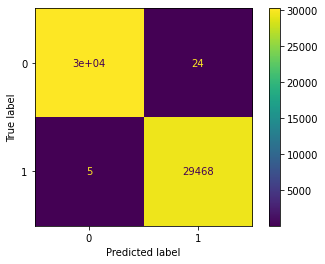

In [95]:
plot_confusion_matrix(svclassifierpoly, X_test, y_test)  
plt.show() 

In [96]:
print(classification_metrics(y_test, y_pred5))

   accuracy_score  f1_score  precision_score  recall_score
0        0.999515  0.999508         0.999186       0.99983


#### noyau gaussien:

In [97]:
svclassifierrbf = SVC(kernel='rbf')
svclassifierrbf.fit(X_train, y_train.values.ravel())

SVC()

In [98]:
y_pred6= svclassifierrbf.predict(X_test)

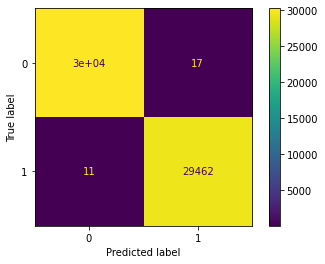

In [99]:
plot_confusion_matrix(svclassifierrbf, X_test, y_test)  
plt.show() 

In [100]:
print(classification_metrics(y_test, y_pred6))

   accuracy_score  f1_score  precision_score  recall_score
0        0.999532  0.999525         0.999423      0.999627


#### noyau Sigmoid :

In [101]:
svclassifiersig = SVC(kernel='sigmoid')
svclassifiersig.fit(X_train, y_train.values.ravel())

SVC(kernel='sigmoid')

In [102]:
y_pred7= svclassifiersig.predict(X_test)

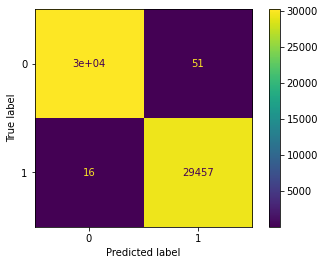

In [103]:
plot_confusion_matrix(svclassifiersig, X_test, y_test)  
plt.show() 

In [104]:
print(classification_metrics(y_test, y_pred7))

   accuracy_score  f1_score  precision_score  recall_score
0        0.998879  0.998864         0.998272      0.999457


## Questions:
* 5. Sur la base des résultats précédents, quelle est la méthode linéaire la plus adaptée à ce problème de classification


Pour les modèles linéaires, il est clair que le modèle svm lineaire après gridsearch( c= 0.1, gamma=1)

## Questions:
* 6. Enfin, mettre en place une méthode (de votre choix) de classification multi-classe;
 * Donner la matrice de confusion et indiquer les languages les plus difficile à distinguer.

#### j'ai choisit le modèle svm linéaire tout en utilisant un grid search pour trouver les meilleurs hyperparamètres du dataframe contenant toute les langues

In [105]:
df_ES = pd.DataFrame(data=FeaES)
df_ES.head()
df_ES["langue"]=2
df_ES.head()

,0,1,2,3,4,5,6,7,8,9,...,693,694,695,696,697,698,699,700,701,langue
0,10,0,6,4,14,1,0,7,6,0,...,0,0,0,0,0,0,0,0,0,2
1,14,0,1,11,14,1,1,2,4,1,...,0,0,0,0,0,0,0,0,0,2
2,9,2,1,12,15,0,0,2,7,1,...,0,0,0,0,0,0,0,0,0,2
3,10,2,2,7,12,0,2,4,11,1,...,0,0,0,0,0,0,0,0,0,2
4,13,0,0,5,8,1,0,3,9,1,...,0,0,0,0,0,0,0,0,0,2


In [106]:
df_FR = pd.DataFrame(data=FeaFR)
df_FR.head()
df_FR["langue"]=3
df_FR.head()

,0,1,2,3,4,5,6,7,8,9,...,693,694,695,696,697,698,699,700,701,langue
0,8,0,2,7,16,0,2,0,10,0,...,0,0,0,0,0,0,0,0,0,3
1,7,1,7,5,18,2,1,1,4,0,...,0,0,0,0,0,0,0,0,0,3
2,5,2,1,3,20,0,1,0,6,0,...,0,0,0,0,0,0,0,0,0,3
3,7,0,7,2,18,1,0,0,8,1,...,0,0,0,0,0,0,0,0,0,3
4,7,1,6,6,20,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,3


### On va creer le nouveau dataframe ou il y a toute les langues

In [107]:
df_totale=pd.concat([df_DE,df_EN,df_ES,df_FR])
df_totale

,0,1,2,3,4,5,6,7,8,9,...,693,694,695,696,697,698,699,700,701,langue
0,1,3,0,7,18,1,5,5,8,1,...,0,0,1,2,0,0,0,0,0,0
1,6,2,5,6,12,9,4,6,7,0,...,0,0,0,0,0,0,0,0,0,0
2,4,4,2,5,18,2,1,2,6,1,...,0,0,1,0,0,0,0,0,0,0
3,10,0,6,5,14,1,3,7,5,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,4,19,2,5,7,7,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41155,11,1,1,3,12,0,3,1,9,0,...,0,0,0,0,0,0,0,0,0,3
41156,7,0,3,6,22,2,2,1,8,0,...,0,0,0,0,0,0,0,0,0,3
41157,3,0,4,3,23,2,0,0,8,1,...,0,0,0,0,0,0,0,0,0,3
41158,8,0,1,7,19,4,2,1,5,0,...,0,0,0,0,0,0,0,0,0,3


### On shuffle les lignes comme on a fait avant 

In [108]:
df_totale=df_totale.sample(frac=1).reset_index(drop=True)
df_totale

,0,1,2,3,4,5,6,7,8,9,...,693,694,695,696,697,698,699,700,701,langue
0,4,1,2,7,18,2,4,5,8,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,3,4,15,1,2,7,10,0,...,0,0,0,0,0,0,0,0,0,1
2,8,3,5,6,14,2,2,5,8,0,...,0,1,0,0,0,0,0,0,0,0
3,9,1,2,4,20,3,1,1,8,0,...,0,0,0,0,0,0,0,0,0,3
4,7,3,6,3,14,2,1,12,8,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169760,8,2,2,6,14,0,3,7,4,0,...,0,0,0,0,0,0,0,0,0,1
169761,16,3,5,5,14,2,2,4,6,0,...,0,0,0,0,0,0,0,0,0,2
169762,3,1,2,5,17,0,6,5,11,0,...,0,0,0,3,0,0,0,0,0,0
169763,7,1,2,1,20,3,2,1,6,2,...,0,0,0,0,0,0,0,0,0,3


In [109]:
X_final=df_totale.drop(["langue"],axis=1)
y_final=df_totale[['langue']]

In [110]:
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.7)

In [111]:
grid.fit(X_train_final,y_train_final.values.ravel())

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=  21.4s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=  18.7s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=  18.7s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=  19.1s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=  19.6s
[CV 1/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=  18.9s
[CV 2/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=  19.2s
[CV 3/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=  19.0s
[CV 4/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=  19.1s
[CV 5/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=  19.7s
[CV 1/5] END ...............C=0.1, gamma=0.01, kernel=linear; total time=  19.3s
[CV 2/5] END ...............C=0.1, gamma=0.01, 

[CV 2/5] END .................C=1000, gamma=1, kernel=linear; total time=  21.9s
[CV 3/5] END .................C=1000, gamma=1, kernel=linear; total time=  21.6s
[CV 4/5] END .................C=1000, gamma=1, kernel=linear; total time=  20.8s
[CV 5/5] END .................C=1000, gamma=1, kernel=linear; total time=  22.2s
[CV 1/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=  21.5s
[CV 2/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=  21.8s
[CV 3/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=  22.0s
[CV 4/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=  20.3s
[CV 5/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=  22.7s
[CV 1/5] END ..............C=1000, gamma=0.01, kernel=linear; total time=  22.4s
[CV 2/5] END ..............C=1000, gamma=0.01, kernel=linear; total time=  22.6s
[CV 3/5] END ..............C=1000, gamma=0.01, kernel=linear; total time=  22.4s
[CV 4/5] END ..............C

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

### l'entrainement a pris presque 50 minutes 

In [112]:
grid.score(X_test_final,y_test_final)

0.9958430105355279

In [113]:
y_grid_final_pred=grid.predict(X_test_final)

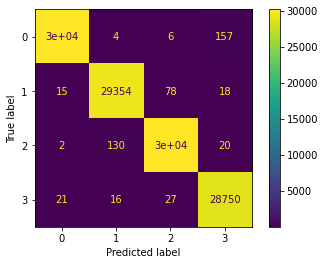

In [114]:
plot_confusion_matrix(grid, X_test_final, y_test_final)  
plt.show() 

à partir de la matrice de confusion on peut dire que le modèle se trompe plus à distinguer la langue française et la confend avec l'allemand , de même le modèle confuse l'anglais est le prend pour espagnol